# National Achievement Survey
##### -Notebook by Aditya Krishnan

Dataset: appingway-usecase-nas.7z

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Jumping straight to the questions at hand

## 1. What influences students' performance most?

Importing the db and changing some column headers for easier access.

In [2]:
full = pd.read_csv('./nas-pupil-marks.csv')
full = full.rename(columns={'Maths %':'MathsP','Reading %':'ReadingP','Science %':'ScienceP','Social %':'SocialP'})

Given, we have the background, habits, resources used by them and their grades/percentages, we can begin with the simplest factor that characterizes a student's academic, their subject performance. But, to judge their overall performance, we need a single point function to determine their score. Let's create an overall performace feature which will be an average of their percentages among all subjects. 

In [3]:
full['Overall'] = full[['MathsP','ScienceP','ReadingP','SocialP']].mean(axis=1)

We have the overall score. Now, to understand the performance between the worst and the best students, let's begin to trace their traits. But before that, we create two dataframes consisting of the best and worst 500 students. And even before that, we can see that many students haven't taken up any subject yet, so their overall score is NA. We need to eliminate them.

In [4]:
full = full[np.isfinite(full['Overall'])]

Creating the best and worst dataframes

In [5]:
bestStudents =  full.sort_values('Overall',ascending=False).iloc[:500,:]
worstStudents = full.sort_values('Overall',ascending=False).iloc[-500:,:]

We are using seaborn to represent our plots. Just a little tweaking of it's color palette for better visuals.  

In [6]:
sns.set(style="whitegrid", palette="muted")
muted1 = ["#4878CF", "#D65F5F", "#6ACC65", "#B47CC7", "#C4AD66", "#77BEDB"]

### 1.1 Family Background

By a simple going-through of the two frames, it is difficult to miss students' background are quite different. Beginning with the Father's Education. A significant amount of fathers of best students are atleast primary school educated. While on the other hand, worst students' fathers are mostly illiterate.

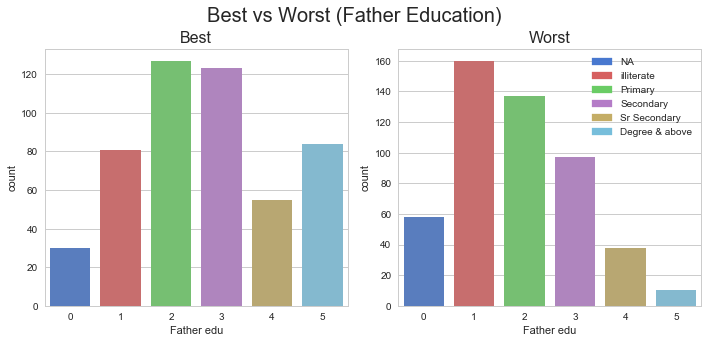

In [7]:
f, ax = plt.subplots(1,2,figsize=(10,5))

ax=plt.subplot(121)
sns.countplot(x='Father edu',data=bestStudents,palette = muted1)
ax.set_title("Best",fontsize=16)

ax=plt.subplot(122)
sns.countplot(x='Father edu',data=worstStudents,palette = muted1)
ax.set_title("Worst",fontsize=16)

blue_patch = mpatches.Patch(color='#4878CF')
green_patch = mpatches.Patch(color='#D65F5F')
red_patch = mpatches.Patch(color='#6ACC65')
pur_patch = mpatches.Patch(color='#B47CC7')
yel_patch = mpatches.Patch(color='#C4AD66')
lb_patch = mpatches.Patch(color='#77BEDB')
plt.legend(handles=[blue_patch,green_patch,red_patch,pur_patch,yel_patch,lb_patch],labels=["NA","illiterate",
         "Primary","Secondary","Sr Secondary","Degree & above"])

f.suptitle('Best vs Worst (Father Education)',fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Moving ahead, we can see more best students to be above the poverty level that worst students.

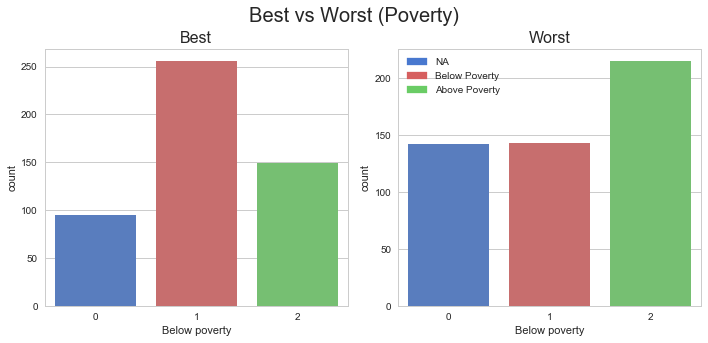

In [8]:
f, ax = plt.subplots(1,2,figsize=(10,5))

ax=plt.subplot(121)
sns.countplot(x='Below poverty',data=bestStudents,palette = muted1)
ax.set_title("Best",fontsize=16)

ax=plt.subplot(122)
sns.countplot(x='Below poverty',data=worstStudents,palette = muted1)
ax.set_title("Worst",fontsize=16)

blue_patch = mpatches.Patch(color='#4878CF', label='NA')
green_patch = mpatches.Patch(color='#D65F5F', label='Below Poverty')
red_patch = mpatches.Patch(color='#6ACC65', label='Above Poverty')
plt.legend(handles=[blue_patch,green_patch,red_patch],labels=["NA","Below Poverty","Above Poverty"])
f.suptitle('Best vs Worst (Poverty)',fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### 1.2 Resources

Coming to the resources used by the students, we can see that best students tend to use more calculator and dictionary than worst students.

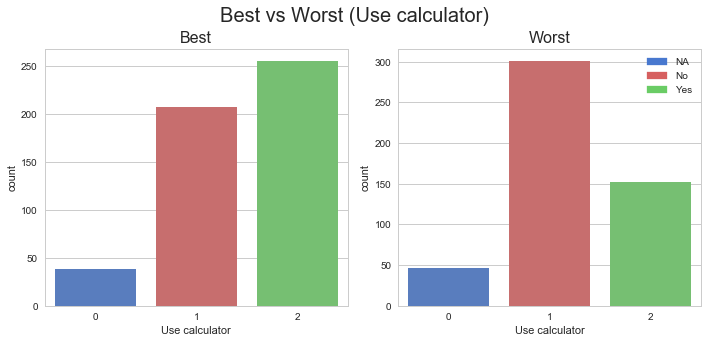

In [9]:
f, ax = plt.subplots(1,2,figsize=(10,5))

ax=plt.subplot(121)
sns.countplot(x='Use calculator',data=bestStudents,palette = muted1)
ax.set_title("Best",fontsize=16)

ax=plt.subplot(122)
sns.countplot(x='Use calculator',data=worstStudents,palette = muted1)
ax.set_title("Worst",fontsize=16)

blue_patch = mpatches.Patch(color='#4878CF')
green_patch = mpatches.Patch(color='#D65F5F')
red_patch = mpatches.Patch(color='#6ACC65')
plt.legend(handles=[blue_patch,green_patch,red_patch],labels=["NA","No","Yes"])
f.suptitle('Best vs Worst (Use calculator)',fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

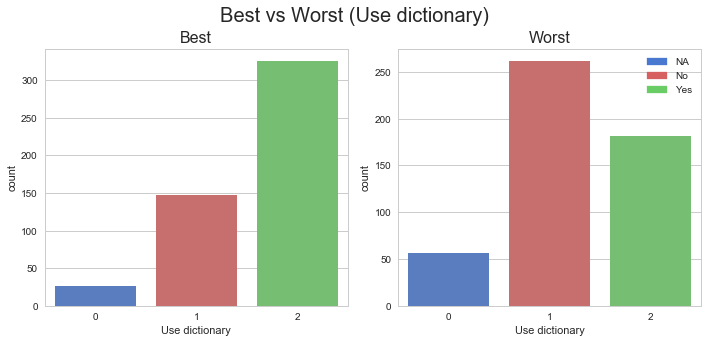

In [10]:
f, ax = plt.subplots(1,2,figsize=(10,5))

ax=plt.subplot(121)
sns.countplot(x='Use dictionary',data=bestStudents,palette = muted1)
ax.set_title("Best",fontsize=16)

ax=plt.subplot(122)
sns.countplot(x='Use dictionary',data=worstStudents,palette = muted1)
ax.set_title("Worst",fontsize=16)

blue_patch = mpatches.Patch(color='#4878CF')
green_patch = mpatches.Patch(color='#D65F5F')
red_patch = mpatches.Patch(color='#6ACC65')
plt.legend(handles=[blue_patch,green_patch,red_patch],labels=["NA","No","Yes"])
f.suptitle('Best vs Worst (Use dictionary)',fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### 1.3 Mentality

And as a general tend, we can observe that worst students tend to not take Reading as a subject.

In [11]:
bestStudents['ReadingP'].isnull().sum() #Output - 125
worstStudents['ReadingP'].isnull().sum() #Output - 237

237

Though, these are the general observations and might might be critical during feature engineering. The performnace of a student is broadly subjective and will be analyzed further in the next sections.

## How do boys and girls perform across states?

Since we are going to perform many operations for boys and girls alike, it would be better if we separate them beforehand to further keep the code simple. Let's begin with creating two dataframes for boys and girls.

In [12]:
boys = full.loc[full['Gender']==1]
girls = full.loc[full['Gender']==2]

Starting with the academic performances. Let's begin by calculating the average performance of students in different states for each and every subject. Starting with maths. 

Creating a series of all the states

In [13]:
states = list(full['State'].unique())
statesSeries = pd.Series(states)

### 2.1 Academics

Making separate tables for boys and girls for the statewise and genderwise distribution of Maths percentages.

In [14]:
#mean for MathsP of boys
mathMeanBoys = pd.DataFrame()
mathMeanBoys['State'] = statesSeries.values
mathMeanBSeries = boys.groupby('State')['MathsP'].mean()
mathMeanBoys = mathMeanBoys.sort_values('State')
mathMeanBoys['MathsP'] = mathMeanBSeries.values
mathMeanBoys['Gender'] = "Boys"

#mean for MathsP of girls
mathMeanGirls = pd.DataFrame()
mathMeanGirls['State'] = statesSeries.values
mathMeanGirls = mathMeanGirls.sort_values('State')
mathMeanGSeries= girls.groupby('State')['MathsP'].mean()
mathMeanGirls['MathsP'] = mathMeanGSeries.values
mathMeanGirls['Gender']="Girls"

Merging the two frames for simple plotting and sorting the means in the descending order.

In [15]:
frames=[mathMeanBoys,mathMeanGirls]
oMathMean = pd.concat(frames)
oMathMean = oMathMean.sort_values('MathsP',ascending=False)

Creating the vertical barplot

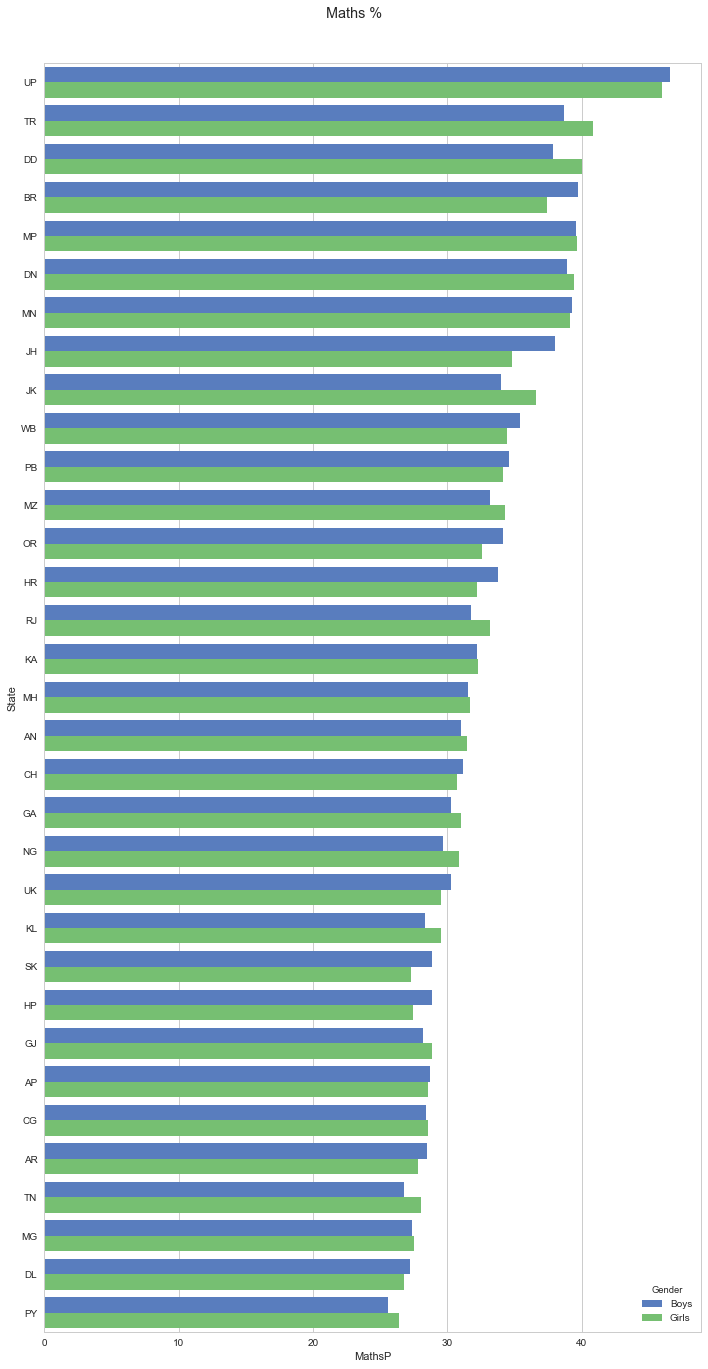

In [16]:
f, ax = plt.subplots(figsize=(10, 20))
muted    = ["#4878CF", "#6ACC65", "#D65F5F", "#B47CC7", "#C4AD66", "#77BEDB"]
newPal   = dict(Boys = muted[0], Girls = muted[1])
sns.barplot(x="MathsP", y="State",data=oMathMean, hue='Gender',palette=newPal)
f.suptitle("Maths %")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

We can see the performances of the students is consistent irrespective of gender in Maths. We can see the same trend for the means of performance in the remaining subjects.

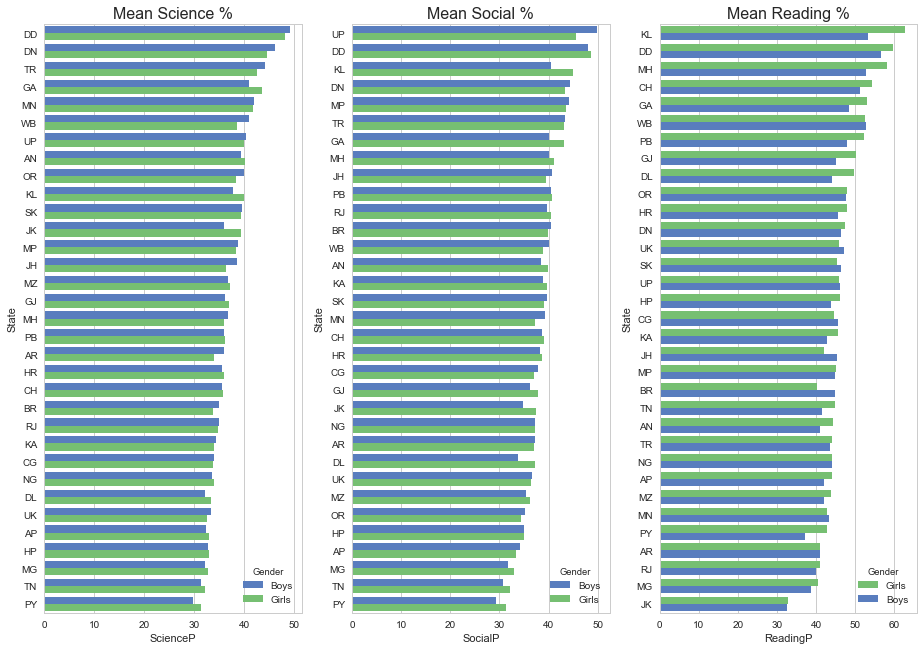

In [17]:
#mean for ScienceP of boys
scienceMeanBoys = pd.DataFrame()
scienceMeanBoys ['State'] = statesSeries.values
scienceMeanBSeries = boys.groupby('State')['ScienceP'].mean()
scienceMeanBoys = scienceMeanBoys .sort_values('State')
scienceMeanBoys ['ScienceP'] = scienceMeanBSeries.values
scienceMeanBoys ['Gender'] = "Boys"

#mean for ScienceP of girls
scienceMeanGirls = pd.DataFrame()
scienceMeanGirls['State'] = statesSeries.values
scienceMeanGirls = scienceMeanGirls.sort_values('State')
scienceMeanGSeries= girls.groupby('State')['ScienceP'].mean()
scienceMeanGirls['ScienceP'] = scienceMeanGSeries.values
scienceMeanGirls['Gender']="Girls"

frames=[scienceMeanBoys ,scienceMeanGirls]
oScienceMean = pd.concat(frames)
oScienceMean = oScienceMean.sort_values('ScienceP',ascending=False)

#mean for ReadingP of boys
readMeanBoys = pd.DataFrame()
readMeanBoys ['State'] = statesSeries.values
readMeanBSeries = boys.groupby('State')['ReadingP'].mean()
readMeanBoys = readMeanBoys .sort_values('State')
readMeanBoys ['ReadingP'] = readMeanBSeries.values
readMeanBoys ['Gender'] = "Boys"

#mean for ReadingP of girls
readMeanGirls = pd.DataFrame()
readMeanGirls['State'] = statesSeries.values
readMeanGirls = readMeanGirls.sort_values('State')
readMeanGSeries= girls.groupby('State')['ReadingP'].mean()
readMeanGirls['ReadingP'] = readMeanGSeries.values
readMeanGirls['Gender']="Girls"

frames=[readMeanBoys ,readMeanGirls]
oReadMean = pd.concat(frames)
oReadMean = oReadMean.sort_values('ReadingP',ascending=False)

#mean for SocialP of boys
socialMeanBoys = pd.DataFrame()
socialMeanBoys ['State'] = statesSeries.values
socialMeanBSeries = boys.groupby('State')['SocialP'].mean()
socialMeanBoys = socialMeanBoys .sort_values('State')
socialMeanBoys ['SocialP'] = socialMeanBSeries.values
socialMeanBoys ['Gender'] = "Boys"

#mean for SocialP of girls
socialMeanGirls = pd.DataFrame()
socialMeanGirls['State'] = statesSeries.values
socialMeanGirls = socialMeanGirls.sort_values('State')
socialMeanGSeries= girls.groupby('State')['SocialP'].mean()
socialMeanGirls['SocialP'] = socialMeanGSeries.values
socialMeanGirls['Gender']="Girls"

frames=[socialMeanBoys ,socialMeanGirls]
oSocialMean = pd.concat(frames)
oSocialMean = oSocialMean.sort_values('SocialP',ascending=False)

f, ax = plt.subplots(1,3,figsize=(13, 10))
ax=plt.subplot(131)
ax.set_title("Mean Science %",fontsize=16)
muted    = ["#4878CF", "#6ACC65", "#D65F5F", "#B47CC7", "#C4AD66", "#77BEDB"]
newPal   = dict(Boys = muted[0], Girls = muted[1])
sns.barplot(x="ScienceP", y="State",data=oScienceMean, hue='Gender',palette=newPal)
ax=plt.subplot(132)
ax.set_title("Mean Social %",fontsize=16)
muted    = ["#4878CF", "#6ACC65", "#D65F5F", "#B47CC7", "#C4AD66", "#77BEDB"]
newPal   = dict(Boys = muted[0], Girls = muted[1])
sns.barplot(x="SocialP", y="State",data=oSocialMean, hue='Gender',palette=newPal)
ax=plt.subplot(133)
ax.set_title("Mean Reading %",fontsize=16)
muted    = ["#4878CF", "#6ACC65", "#D65F5F", "#B47CC7", "#C4AD66", "#77BEDB"]
newPal   = dict(Boys = muted[0], Girls = muted[1])
sns.barplot(x="ReadingP", y="State",data=oReadMean, hue='Gender',palette=newPal)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

We can observe girls perform significantly poor in the Reading subject in all the states.
So let's check their co and extra-curricular habits.

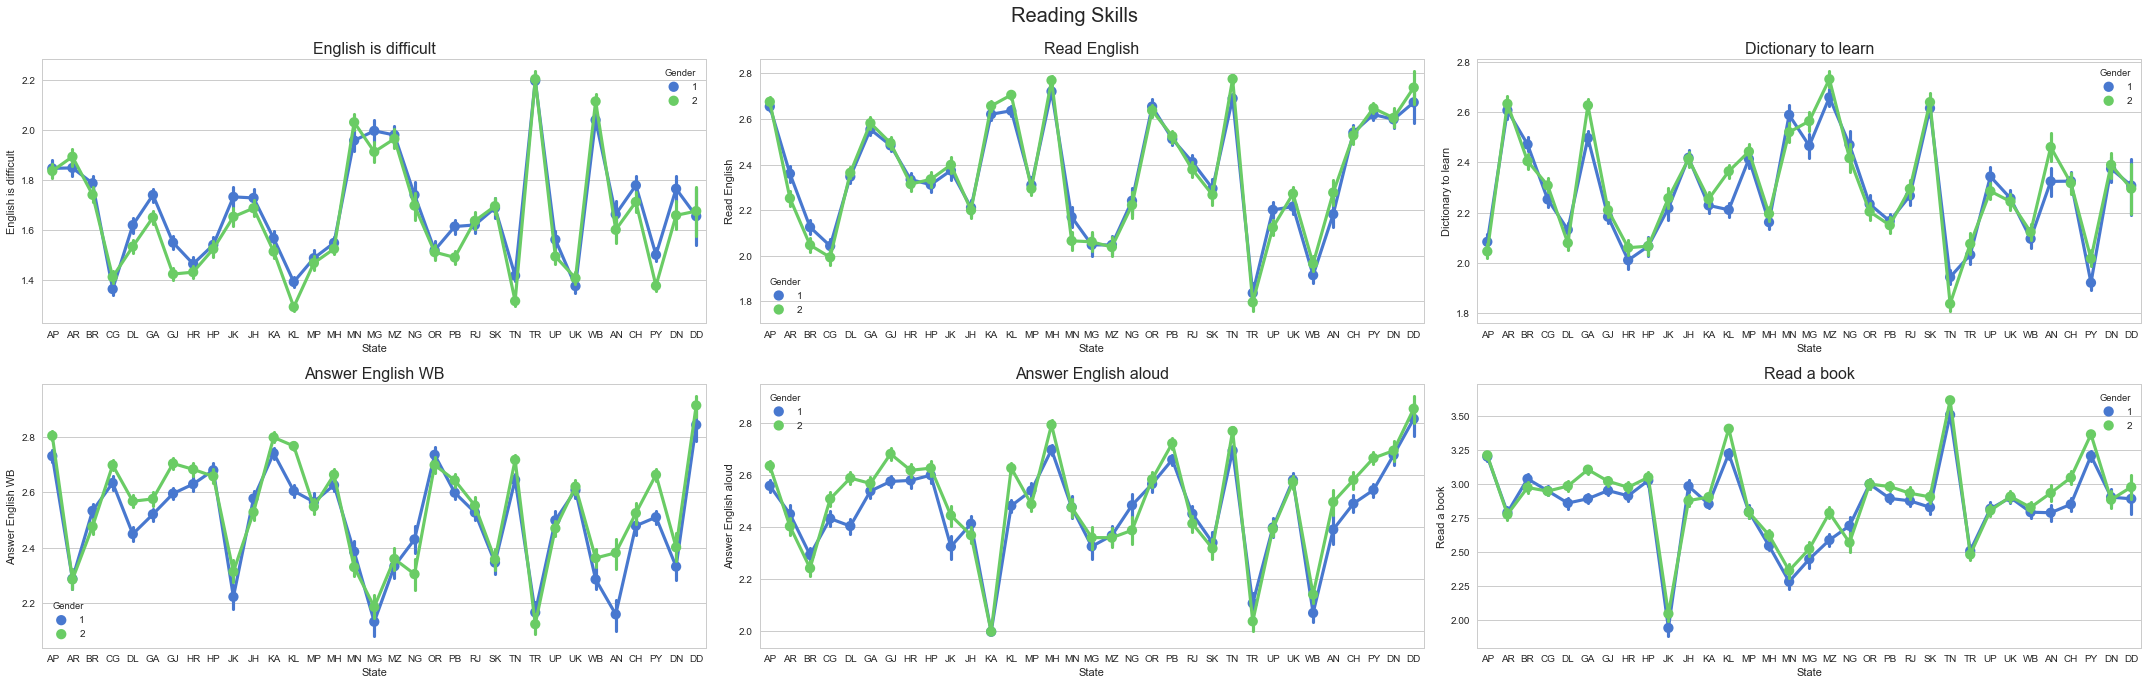

In [18]:
#Reading skills
f, ax = plt.subplots(2,3,figsize=(30, 10))
ax=plt.subplot(231)
sns.pointplot(x="State", y="English is difficult" ,data=full.loc[full['Gender'].isin(['1','2'])],hue="Gender")
ax.set_title("English is difficult",fontsize=16)
ax=plt.subplot(232)
sns.pointplot(x="State", y="Read English" ,data=full.loc[full['Gender'].isin(['1','2'])],hue="Gender")
ax.set_title("Read English",fontsize=16)
ax=plt.subplot(233)
sns.pointplot(x="State", y="Dictionary to learn" ,data=full.loc[full['Gender'].isin(['1','2'])],hue="Gender")
ax.set_title("Dictionary to learn",fontsize=16)
ax=plt.subplot(234)
sns.pointplot(x="State", y="Answer English WB" ,data=full.loc[full['Gender'].isin(['1','2'])],hue="Gender")
ax.set_title("Answer English WB",fontsize=16)
ax=plt.subplot(235)
sns.pointplot(x="State", y="Answer English aloud" ,data=full.loc[full['Gender'].isin(['1','2'])],hue="Gender")
ax.set_title("Answer English aloud",fontsize=16)
ax=plt.subplot(236)
sns.pointplot(x="State", y="Read a book" ,data=full.loc[full['Gender'].isin(['1','2'])],hue="Gender")
ax.set_title("Read a book",fontsize=16)
f.suptitle("Reading Skills",fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Except for slight differences in certain fields. They seem to be the same as boys.

### 2.2 Effort put in by the students

Since the academic performances remain indiferrent between boys and girls. Let's look at their study methods and efforts put in by them. Creaing a grid of various efforts.

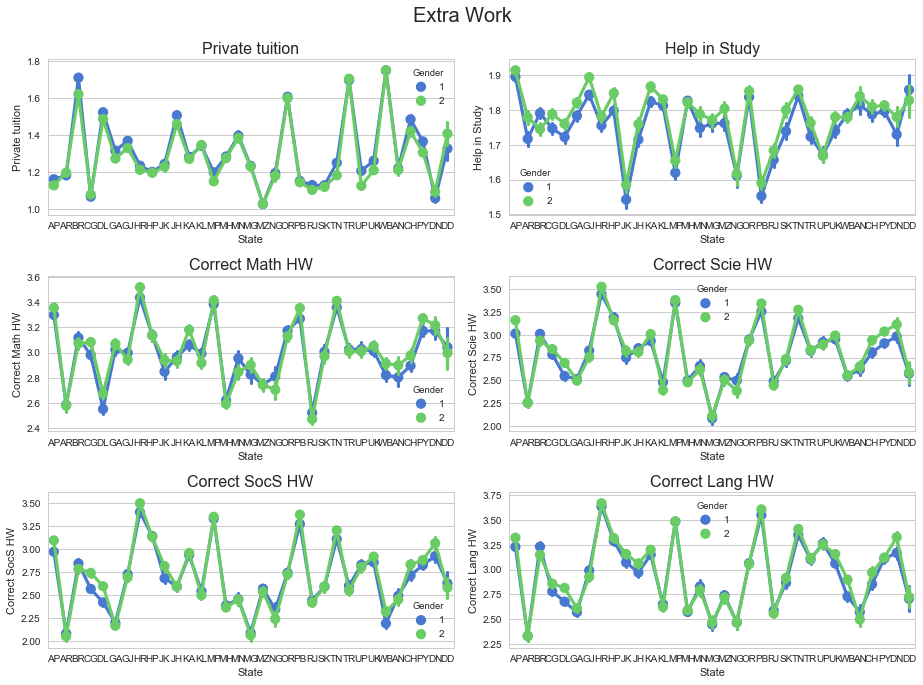

In [19]:
f, ax = plt.subplots(3,2,figsize=(13, 10))
ax = plt.subplot(321)
f.suptitle('Extra Work',fontsize=20)
sns.pointplot(x="State", y="Private tuition" ,data=full.loc[full['Gender'].isin(['1','2'])],hue="Gender")
ax.set_title("Private tuition",fontsize=16)
ax = plt.subplot(322)
sns.pointplot(x="State", y="Help in Study" ,data=full.loc[full['Gender'].isin(['1','2'])],hue="Gender")
ax.set_title("Help in Study",fontsize=16)
ax = plt.subplot(323)
sns.pointplot(x="State", y="Correct Math HW" ,data=full.loc[full['Gender'].isin(['1','2'])],hue="Gender")
ax.set_title("Correct Math HW",fontsize=16)
ax = plt.subplot(324)
sns.pointplot(x="State", y="Correct Scie HW" ,data=full.loc[full['Gender'].isin(['1','2'])],hue="Gender")
ax.set_title("Correct Scie HW",fontsize=16)
ax = plt.subplot(325)
sns.pointplot(x="State", y="Correct SocS HW" ,data=full.loc[full['Gender'].isin(['1','2'])],hue="Gender")
ax.set_title("Correct SocS HW",fontsize=16)
ax = plt.subplot(326)
sns.pointplot(x="State", y="Correct Lang HW" ,data=full.loc[full['Gender'].isin(['1','2'])],hue="Gender")
ax.set_title("Correct Lang HW",fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

We can see that, there is still no difference among boys and girls in terms of performance and study habits. Equal effort and equal outcome is achieved by both. However, we still have to analyze extra curricular activities.

### 2.3 Extra-curricular activities

We have come to find that the only areas where there is a significant difference between boys and girls is in their extra curriculars.

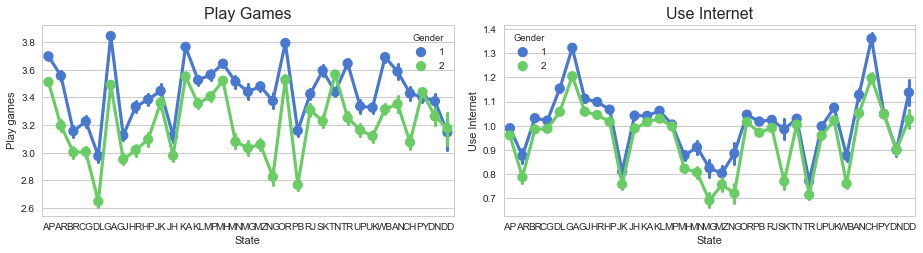

In [20]:
#Extra curricular Significant
f, ax = plt.subplots(1,2,figsize=(13, 4))
ax = plt.subplot(121)
sns.pointplot(x="State", y="Play games" ,data=full.loc[full['Gender'].isin(['1','2'])],hue="Gender")
ax.set_title("Play Games",fontsize=16)
ax = plt.subplot(122)
sns.pointplot(x="State", y="Use Internet" ,data=full.loc[full['Gender'].isin(['1','2'])],hue="Gender")
ax.set_title("Use Internet",fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Thus, ends our analysis for the gender-specific performances.

## 3. Do students from South Indian states really excel at Math and Science?

Let's begin by segregating south Indian students from the dataset. First, let's make a flag which will be set if the student is south Indian.

In [21]:
full['South'] = np.where(full['State'].isin(['AP','KL','KA','TN']),1,0)

Next, let's actually create a new dataframe for south Indian students for easier analysis.

In [22]:
southIndian = full.loc[full['State'].isin(['AP','KL','KA','TN'])]

### 3.1 Academics

Now, to answer the question, let's begin with the academic performances. Let's calculate the average scores of students in maths and science among south Indian students and students from rest of India. Considering both maths and science, here's our boxplots.

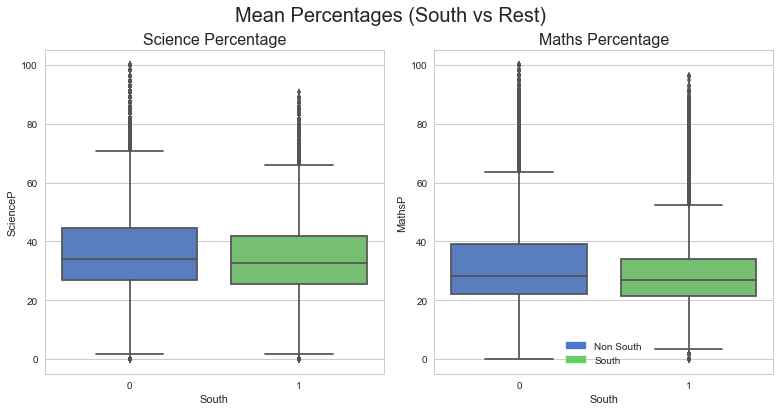

In [23]:
#Percentages
f, ax = plt.subplots(1,2,figsize=(11,6))

ax= plt.subplot(121)
ax.set_title("Science Percentage",fontsize=16)
sns.boxplot(x='South',y='ScienceP',data=full)

ax=plt.subplot(122)
ax.set_title("Maths Percentage",fontsize=16)
sns.boxplot(x='South',y='MathsP',data=full)

blue_patch = mpatches.Patch(color='#4878CF', label='Non South')
green_patch = mpatches.Patch(color='#6ACC65', label='South')
plt.legend(handles=[blue_patch,green_patch],labels=["Non South","South"])
f.suptitle('Mean Percentages (South vs Rest)',fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

We can see that the range of marks among south Indian and rest of Indians remain the same. The middle line in the box represents the mean value, and we can observe that it is in fact slightly below for South Indians. Also the maximum marks achieved by South Indians is less than the national maximum. So considering their percentages, South Indians do no perform better than the rest.  

### 3.2 Co-curricular skills

It's time to evaluate their study habits and school performance. Starting with their maths skills. 

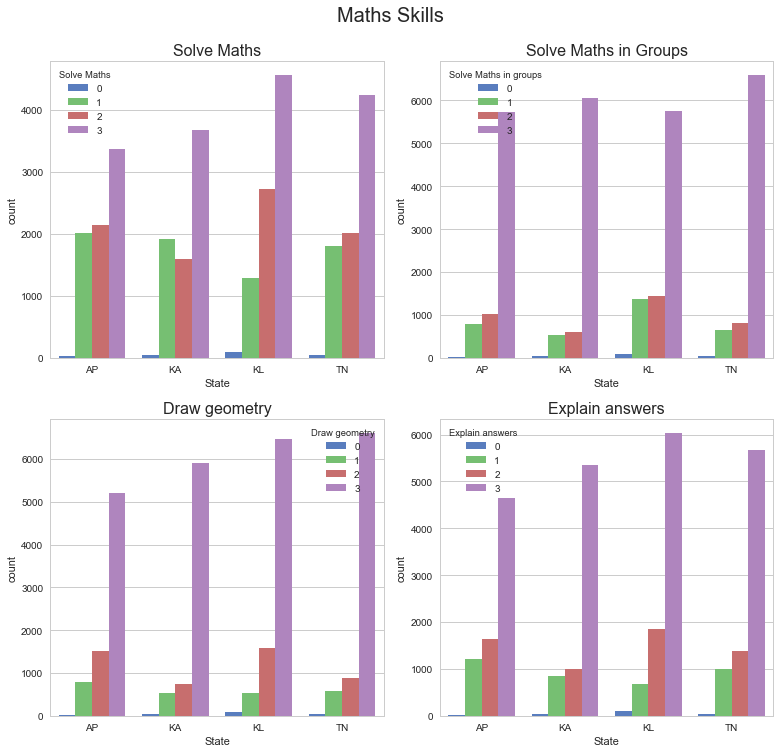

In [24]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(11,11))
ax1=plt.subplot(221)
ax1.set_title("Solve Maths",fontsize=16)
sns.countplot(x='State',hue='Solve Maths',data=southIndian)
ax2=plt.subplot(222)
ax2.set_title("Solve Maths in Groups",fontsize=16)
sns.countplot(x='State',hue='Solve Maths in groups',data=southIndian)
ax3=plt.subplot(223)
ax3.set_title("Draw geometry",fontsize=16)
sns.countplot(x='State',hue='Draw geometry',data=southIndian)
ax4=plt.subplot(224)
ax4.set_title("Explain answers",fontsize=16)
sns.countplot(x='State',hue='Explain answers',data=southIndian)
f.suptitle('Maths Skills',fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Since 3 represents everday, we can see they are persevering and steady in their habits. Checking for science.

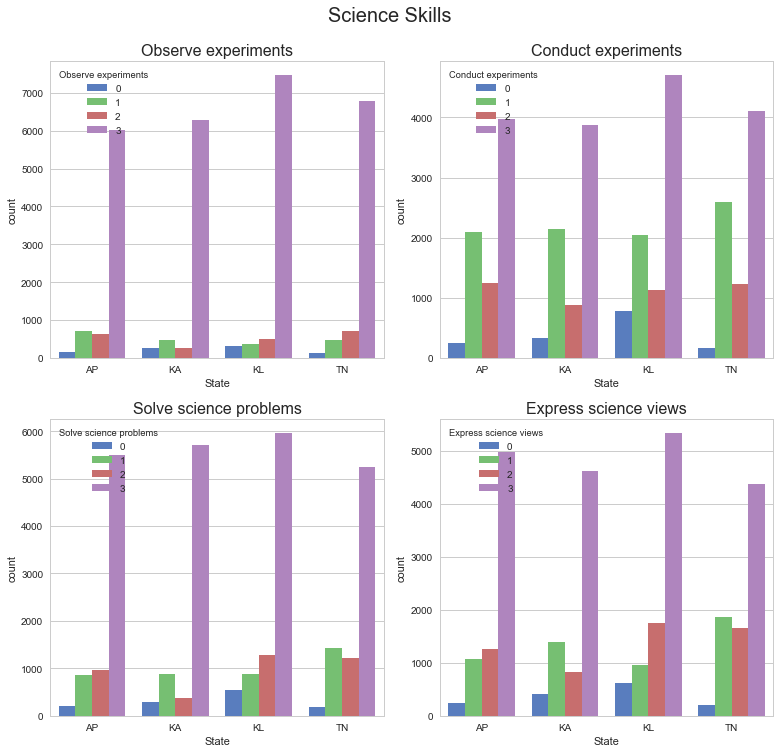

In [25]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(11,11))
ax1=plt.subplot(221)
ax1.set_title("Observe experiments",fontsize=16)
sns.countplot(x='State',hue='Observe experiments',data=southIndian)
ax2=plt.subplot(222)
ax2.set_title("Conduct experiments",fontsize=16)
sns.countplot(x='State',hue='Conduct experiments',data=southIndian)
ax3=plt.subplot(223)
ax3.set_title("Solve science problems",fontsize=16)
sns.countplot(x='State',hue='Solve science problems',data=southIndian)
ax4=plt.subplot(224)
ax4.set_title("Express science views",fontsize=16)
sns.countplot(x='State',hue='Express science views',data=southIndian)
f.suptitle('Science Skills',fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Their science performance is decent as well. So co-curricular activities seem good for South Indian students.

### 3.3 Extra curricular skills

So to make sure, they are not study bugs, let's check their extra curricular activities.

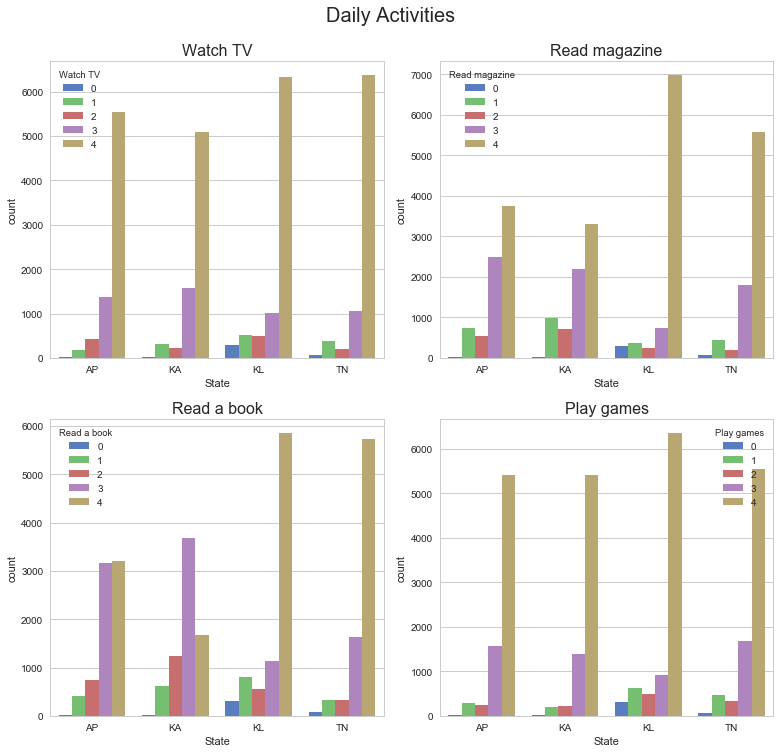

In [26]:
# Multitasking 
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(11,11))
ax1=plt.subplot(221)
ax1.set_title("Watch TV",fontsize=16)
sns.countplot(x='State',hue='Watch TV',data=southIndian)
ax2=plt.subplot(222)
ax2.set_title("Read magazine",fontsize=16)
sns.countplot(x='State',hue='Read magazine',data=southIndian)
ax3=plt.subplot(223)
ax3.set_title("Read a book",fontsize=16)
sns.countplot(x='State',hue='Read a book',data=southIndian)
ax4=plt.subplot(224)
ax4.set_title("Play games",fontsize=16)
sns.countplot(x='State',hue='Play games',data=southIndian)
f.suptitle('Daily Activities',fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

We can see, they are enthusiastic about playful activities as well.

So in conclusion, we can say that South Indians are not better than the rest of Indians, neither are they worse in any other skills. 

## 4. Conclusion

Thank you for taking the time to read through my notebook.
